# ML 3 - Logistic Regression
Instead of binary output, Logistic regression outputs the probability that it belongs to a class

In [275]:
# import libraries
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

In [276]:
# loading the dataset
df = pd.read_excel('ML1_dataset.xlsx', sheet_name='ML3 - Banana')
df.drop('Image', axis=1, inplace=True)
df.head(5)

,R,G,B,Ripeness
0,247.277,235.203,203.795,1
1,242.005,227.006,162.201,1
2,176.264,181.173,158.842,0
3,187.179,194.187,170.547,0
4,237.265,225.627,197.295,1


In [277]:
# Choosing X and d
X = df[['R', 'G', 'B']]/255
d = np.array(df['Ripeness'])
d = np.reshape(d, (len(d),1))

# adding a bias
X.insert(0, 'Bias', 1)

print('X-shape: ', X.shape)
print('d-shape: ', d.shape)
X.head(5)

X-shape:  (42, 4)
d-shape:  (42, 1)


,Bias,R,G,B
0,1,0.969714,0.922365,0.799196
1,1,0.949039,0.890220,0.636082
2,1,0.691231,0.710482,0.622910
3,1,0.734035,0.761518,0.668812
4,1,0.930451,0.884812,0.773706


In [288]:
# defining the same formulas I used from the Perceptron Algorithm

# define z function
def Z(X,w):
    """
    outputs the Z with shape (n_features,1)
    """   
    a = np.dot(X,w)
        
    z = []
    for ai in a:
        theta = 1/(1 + np.exp(-(beta*ai)))  
        z.append(theta)
        
    z = np.array(z)
    z = np.reshape(z, (X.shape[0],1))
    
    return np.array(z)

# define weight calculation function
def w_delta(Z, D, X):
    delta = (d - Z) * eta * X
    delta = delta.sum(axis=0)
    return delta

In [331]:
# initialize weights
n_iter = 1000
w = np.zeros((X.shape[1],1))  # shape = (4,1)
beta = 100
eta = 0.01

for i in range(n_iter):
    z = Z(X,w)
    w_new = np.array(w_delta(z, d, X))
    w_new = w_new.reshape((w_new.shape[0],1))
    w += w_new

## Testing the model on new images 

<br> 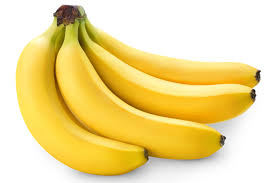 </br>

<br> <center> Image 0: This should be 1 or ripe.</center> </br>

<br> 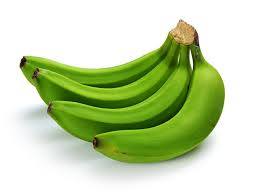 </br>

<center> Image 1: This should be 0 or unripe. </center>

<br> 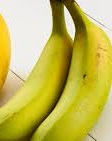 </br>

<center> Image 2: This should be higher than the probability in Image 1 </center>

In [332]:
def sigmoid(test,w):
    a = np.dot(test,w)
    theta = 1/(1 + np.exp(-beta*a))
    return theta

# features of new images for testing
test_data = [[249,209,69], [117,168,29], [201,192,40]]
test_df = pd.DataFrame(test_data, columns = ['R', 'G', 'B'])/255
test_df.insert(0, 'Bias', 1)
test_df['Probability'] = sigmoid(test_df,w)
test_df.head(5)

,Bias,R,G,B,Probability
0,1,0.976471,0.819608,0.270588,1.000000e+00
1,1,0.458824,0.658824,0.113725,4.954550e-29
2,1,0.788235,0.752941,0.156863,1.000000e+00


In [328]:
# testing it on learned images
test2_df = df[['R','G','B']]/255
test2_df.insert(0, 'Bias', 1)
test2_df['Probability'] = sigmoid(test2_df,w)

test2_df = test2_df.join(df['Ripeness'])
test2_df.head(5)

,Bias,R,G,B,Probability,Ripeness
0,1,0.969714,0.922365,0.799196,0.604407,1
1,1,0.949039,0.890220,0.636082,0.821376,1
2,1,0.691231,0.710482,0.622910,0.061909,0
3,1,0.734035,0.761518,0.668812,0.064318,0
4,1,0.930451,0.884812,0.773706,0.528466,1
